In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'Downloads/Dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 22497 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        'Downloads/Dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2501 images belonging to 2 classes.


# Build CNN Model

In [4]:
#initialize
cnn = tf.keras.models.Sequential()

#add convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu', input_shape =[64,64,3]))

# Pooling

In [5]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
#add one more layer

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# Flatten

In [7]:
cnn.add(tf.keras.layers.Flatten())

In [8]:
#full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [9]:
#output layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [10]:
#Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model

In [23]:
history= cnn.fit(x=train_generator, validation_data = validation_generator,epochs=10)

Epoch 1/10
704/704 [==============================] - 392s 557ms/step - loss: 0.4349 - accuracy: 0.7947 - val_loss: 0.4362 - val_accuracy: 0.7973
Epoch 2/10
704/704 [==============================] - 366s 520ms/step - loss: 0.4161 - accuracy: 0.8080 - val_loss: 0.4203 - val_accuracy: 0.8073
Epoch 3/10
704/704 [==============================] - 360s 511ms/step - loss: 0.4030 - accuracy: 0.8168 - val_loss: 0.4322 - val_accuracy: 0.8057
Epoch 4/10
704/704 [==============================] - 357s 507ms/step - loss: 0.3916 - accuracy: 0.8227 - val_loss: 0.4427 - val_accuracy: 0.7981
Epoch 5/10
704/704 [==============================] - 358s 508ms/step - loss: 0.3939 - accuracy: 0.8195 - val_loss: 0.4930 - val_accuracy: 0.7893
Epoch 6/10
704/704 [==============================] - 362s 514ms/step - loss: 0.3610 - accuracy: 0.8386 - val_loss: 0.4188 - val_accuracy: 0.8113
Epoch 7/10
704/704 [==============================] - 355s 505ms/step - loss: 0.3536 - accuracy: 0.8425 - val_loss: 0.3900 -

In [12]:
#if there are any corrupted images on the dataset following code will show it which are the corrupted images

import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("Downloads/Dataset").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [24]:
# make singke prediction

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('Downloads/Dataset/single_prediction/12.jpg', target_size=(64,64))  #to predict the image specify the file name
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction = 'Dog'
else:
    prediction = 'Cat'


In [25]:
prediction   #single prediction check

'Dog'

In [29]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


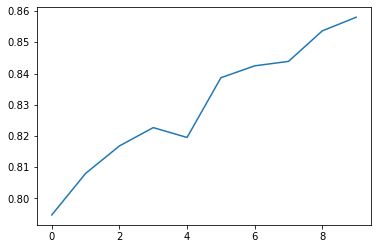

In [30]:
plt.plot(history.history['accuracy'])

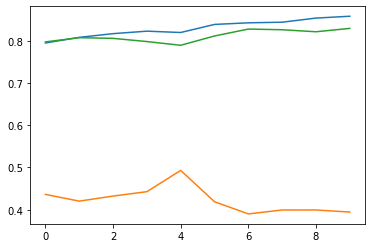

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])